In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.INFO)

In [10]:
#loading the Data_sets from mnist
mnist = learn.datasets.load_dataset("mnist")
#separating data's as training and testing 
train_data = mnist.train.images
train_label = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_label = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [17]:
min_examples = 10000
data = train_data[:min_examples]
label = train_label[:min_examples]
print(len(data[0]))

784


In [93]:
def display(i):
    img = test_data[i]
    plt.title("Example: {} , Label: {}".format(i, test_label[i]))
    plt.imshow(img.reshape(28,28), cmap = plt.cm.gray_r)

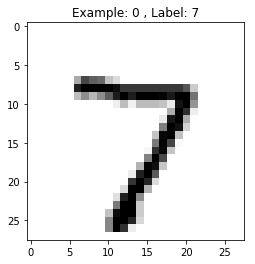

In [94]:
display(0)

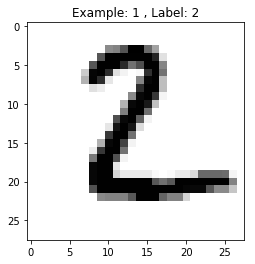

In [95]:
display(1)

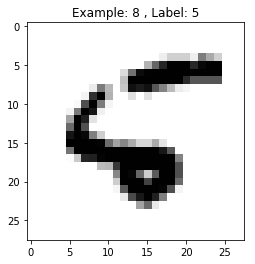

In [29]:
display(8)

In [116]:
#well start with a simple classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes=10, feature_columns= feature_columns)
#gradientDescent and all the weights are handled by this fit method underthehood
classifier.fit(data, label, batch_size = 100, steps = 1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2ae6070f90>, '_model_dir': '/tmp/tmptKE6no', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmptKE6no/model.ckpt.
INFO:tensorflow:loss = 2.3025854, step = 1
INFO:tensorflow:global_step/sec: 174.02
INFO:tensorflow:loss = 0.3614456, step = 101 (0.577 sec)
INFO:tensorflow:global_step/sec: 339.991
INFO:tensorflow:loss = 0.

LinearClassifier(params={'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f2ae65add10>, 'joint_weights': False, 'optimizer': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]})

In [80]:
#Testing our model once trained
classifier.evaluate(test_data, test_label)
# we achieved 91% of accurcay for our model      
print classifier.evaluate(test_data, test_label)['accuracy']                                      

INFO:tensorflow:Starting evaluation at 2018-03-18-02:44:48
INFO:tensorflow:Restoring parameters from /tmp/tmp7c3IpV/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-18-02:44:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9137, global_step = 1000, loss = 0.31026527
INFO:tensorflow:Starting evaluation at 2018-03-18-02:44:49
INFO:tensorflow:Restoring parameters from /tmp/tmp7c3IpV/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-18-02:44:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9137, global_step = 1000, loss = 0.31026527
0.9137


In [89]:
#once get's right time to explore the model
def testing(n):
    new_samples = np.array([test_data[n]], dtype=int) 
    y = list(classifier.predict(new_samples, as_iterable=True)) 
    print("Predicted {0}, Label: {1}".format(str(y), test_label[n]))
    display(n)

INFO:tensorflow:Restoring parameters from /tmp/tmptKE6no/model.ckpt-1000
Predicted [5], Label: 1


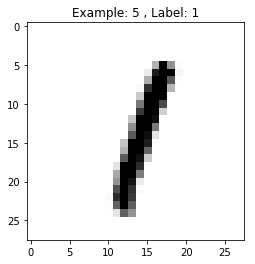

In [117]:
testing(5)

INFO:tensorflow:Restoring parameters from /tmp/tmpNesTiB/model.ckpt-1000
Predicted [5], Label: 5


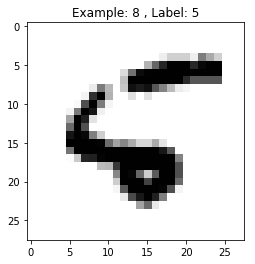

In [98]:
testing(8)

INFO:tensorflow:Restoring parameters from /tmp/tmpNesTiB/model.ckpt-1000
Predicted [5], Label: 2


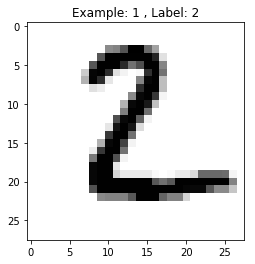

In [100]:
testing(1)

In [124]:
#Visualizing learned weights
weights  = classifier.weights_
f, axes = plt.subplot(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28,28), cmap = plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())
plt.show()

ValueError: Illegal argument(s) to subplot: (2, 5)

<Figure size 432x288 with 0 Axes>